# LSTM Model Demo

In [3]:
import pandas as pd

## Load 5 CSV files

In [4]:
# load 5 csv files for LSTM

kuchive = pd.read_csv('kuchive.csv')
contest = pd.read_csv('contest_tagfixed.csv')
activity = pd.read_csv('activity_tagfixed.csv')
jobs = pd.read_csv('jobs.csv')
clubs = pd.read_csv('clubs_tagfixed.csv')

In [5]:
# leave only the description and tags columns
# we will use {description} as x, and {tags} as y target values

kuchive = kuchive.iloc[:, [6, 7]]
contest = contest.iloc[:, [7, 8]]
activity = activity.iloc[:, [7, 8]]
jobs = jobs.iloc[:, [3, 6]]
clubs = clubs.iloc[:, [3, 4]]

In [6]:
kuchive.head()
# kuchive.info()

,description,tags
0,장애학생지원센터 서포터즈 모해 10기,['봉사']
1,장애학생지원센터에서는 다음과 같이 2020학년도 1학기 장애학생 도우미를 모집합니다...,['봉사']
2,고대인들을 다학제적융합인재로 성장시키기위한 인문학 교육 특강- 강연 제목 : 당신이...,"['예술','사회']"
3,고대인들을 다학제적융합인재로 성장시키기위한 인문학 교육 특강- 강연 제목 : 미국의...,"['예술','IT']"
4,고대인들을 다학제적융합인재로 성장시키기위한 인문학 교육 특강- 강연 제목 : 영화를...,['예술']


In [7]:
contest.head()
# contest.info()

,description,tags
0,2020년 한국야쿠르트 마케팅 공모전 ■ 공모주제 · 언택트 시대에 걸맞은 차별...,"['공모전', '경영']"
1,제1회 도전.한국 대국민 아이디어 공모전▷ 지원자격 : 관심 있는 국민‧기업‧단체...,"['공모전', '봉사']"
2,2020년 K-water 대국민 환경 빅데이터 공모전▷ 담당자 전화번호 :042-6...,"['공모전', 'IT', '과학']"
3,[기획재정부] 국민참여예산 대학생 공모전 (~8/31)■ 신청기간2020년 6월 2...,"['공모전', '사회']"
4,2020 제26회 문학동네 소설상 공모▷ 응모마감 : 2020년 8월 30일 (마감...,['공모전']


In [8]:
activity.head()
# activity.info()

,description,tags
0,[코로나 관련 안내]- 아름다운가게는 안전한 자원활동 현장 지침을 적용 중이며 수시...,"['대외활동', '경영', '봉사']"
1,★ 모집내용지원자격 : 대학교 재학 또는 휴학생 (블로그 및 SNS 활용자) (4학...,"['대외활동', '기타']"
2,***전세게적 코로나 팬더믹으로 인해 2020년 모든 일정이 2021년 03월이후로...,"['대외활동', '사회', '봉사']"
3,고용노동부주관 기관평가 5년 인증 최우수 기관!국내 최고의 SW 전문인력 양성기관멀...,"['대외활동', 'IT']"
4,2020 중앙자살예방센터 자살유발정보 모니터링단 지켜줌인(人) 모집▷ 모집 기간 ...,"['대외활동', '봉사']"


In [9]:
# jobs의 tag 수정하기
def make_to_list(x):
    x = '['+'\''+x+'\''+']'
    return x

jobs.tags = jobs.tags.apply(lambda x: make_to_list(x) )
jobs.head()

,description,tags
0,\n코로나19로 중단된 상시 자기소개서첨삭 서비스를 한시적으로 온라인으로 진행하고자...,['취업']
1,\n코로나19로 중단된 상시 자기소개서첨삭 서비스를 한시적으로 온라인으로 진행하고자...,['취업']
2,\n코로나19로 중단된 일대일커리어상담서비스를 한시적으로 온라인으로 진행하고자 합니...,['취업']
3,\n본 페이지는 '2020년 상반기 기업면접리뷰 워크숍' 신청페이지입니다.\n\n1...,['취업']
4,\n'2020년 상반기 취업수기 공모'를 안내드립니다.\n\n※ 신청절차(단계별 상...,['취업']


In [10]:
# rename column name of clubs dataframe: cleantxt to description

clubs.rename(columns = {'cleantxt': 'description'}, inplace = True)
clubs.tags = clubs.tags.apply(lambda x: x.replace(', \'\'',''))
clubs.head()

,description,tags
0,안녕하세요 한일문화연구회에서 함께할 동아리원을 모집합니다 일본문화에 관심이 있으신...,"['한일문화연구회', '동아리', '언어', '사회']"
1,2020학년도 2학기 KUISA 14기 벗 모집이 하루 남았습니다!!!!!! 202...,"['KUISA', '언어', '친목']"
2,1분 명상법! 안녕하세요! 원불교 학생회입니다. 이번에는 명상을 어떻게 하는 지...,"['원불교', '동아리', '종교']"
3,연합발표토론동아리 POP 22기 모집합니다 ! 22기 P.O.P 단원 모집! 스...,"['POP', '동아리', '언어', '스터디', '연합']"
4,D2!!!! 쿠이사 20202 벗 모집 2020년도 2학기 KUISA 14기 벗 모...,"['KUISA', '언어', '친목']"


In [11]:
# clubs의 first tag delete
# 학회/동아리명 삭제
# tags를 list 형식으로 변형

import ast


def tostring(x):
    return ast.literal_eval(x)

kuchive.tags = kuchive.tags.apply(lambda x: tostring(x))
contest.tags = contest.tags.apply(lambda x: tostring(x))
activity.tags = activity.tags.apply(lambda x: tostring(x))
jobs.tags = jobs.tags.apply(lambda x: tostring(x))
clubs.tags = clubs.tags.apply(lambda x: tostring(x)[1:])

## Concat all Dataframes together

In [12]:
df_all = pd.concat([kuchive, contest, activity, jobs, clubs])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 576
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  1005 non-null   object
 1   tags         1012 non-null   object
dtypes: object(2)
memory usage: 23.7+ KB


In [13]:
df_all = df_all.reset_index(drop=True)

## DATA Preprocessing

In [14]:
import numpy as np

print('전처리 전 훈련용 샘플의 개수 :',len(df_all))
df_all['description'] = df_all['description'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z ]","") # 한글, 영어, 숫자 제외 다 제거
df_all['description'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경

df_all = df_all.dropna(how='any') # Null 값 제거

print('전처리 후 훈련용 샘플의 개수 :',len(df_all))

전처리 전 훈련용 샘플의 개수 : 1012
전처리 후 훈련용 샘플의 개수 : 999


In [15]:
with open('index.txt', 'w') as f:
    for item in df_all.index:
        f.write("%s\n" % item)

In [16]:
from konlpy.tag import Okt

okt = Okt()

In [17]:
import ssl
from urllib.request import urlopen
from bs4 import BeautifulSoup
# konlpy 사용해서 전처리
# stopwords 없애기, 어간/어미 등으로 나누기

context = ssl._create_unverified_context()
resp = urlopen('https://www.ranks.nl/stopwords/korean',context=context)
dom = BeautifulSoup(resp.read().decode('utf8'),'html.parser')
tds = dom.select('.panel-body > table > tbody > tr > td')

In [18]:
import re

stopwords=[]

for _ in tds:
    stopwords+=re.findall(r'([ \w]+)<br/>',str(_))
    
stopwords.append('만큼')
stopwords.append('만 못하다')
stopwords.append('영')
stopwords.append('의')
stopwords.append('하다')
stopwords.append('가')
stopwords.append('이')
stopwords.append('은')
stopwords.append('좀')
stopwords.append('를')
stopwords.append('들')
stopwords.append('는')
stopwords.append('잘')
stopwords.append('자')
stopwords.append('에')
stopwords.append('와')
stopwords.append('한')
stopwords.append('과')
stopwords.append('도')

## Tags to Index

In [19]:
X = []

for sentence in df_all['description']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X.append(temp_X)

In [21]:
# turn tags to sequences
from collections import Counter

y = df_all.tags

counts_tags = Counter()
for list_ in y:
    counts_tags.update(list_)

In [22]:
# map tags to sequences, so we can appy the data to the LSTM model

tag2index = {}
tagwords = []
for tagword in counts_tags:
    tag2index[tagword] = len(tagwords)
    tagwords.append(tagword)

In [23]:
# check the mapping dictionary

tag2index

{'봉사': 0,
 '예술': 1,
 '사회': 2,
 'IT': 3,
 '공모전': 4,
 '경영': 5,
 '과학': 6,
 '미술': 7,
 '대외활동': 8,
 '기타': 9,
 '운동': 10,
 '취업': 11,
 '동아리': 12,
 '언어': 13,
 '친목': 14,
 '종교': 15,
 '스터디': 16,
 '연합': 17,
 '학회': 18,
 '음악': 19}

In [24]:
# tokens(words) to sequences

new_y = []

for list_ in y:
    list_ = [tag2index[item] for item in list_]
    new_y.append(list_)
    
 

In [25]:
# Multi One-Hot Encode(?) y_train data
# ex> 0 0 0 0 0 1 1 0 0 0 0 0 형식으로 (1은 해당하는 태그, 0은 해당하지 않는 태그)
# 참고한 사이트: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html


from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(new_y)


mlb.classes_

# 정확하게 20개의 class를 잡은 것을 확인

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

## Train - Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_test_tokens = X_test.copy()
y_test_tmp = y_test.copy()
y_test_tags = mlb.inverse_transform(y_test_tmp)

# copy lists for saving after test

## Tokenizing Words

In [28]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

Using TensorFlow backend.


In [29]:
# texts_to_sequences: Transforms each text in texts to a sequence of integers.
# Only top num_words-1 most frequent words will be taken into account. 
# Only words known by the tokenizer will be taken into account.
# 참고: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer#texts_to_sequences

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [30]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 150

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


# about pad_sequences: https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do

In [34]:
# save the tokenizer
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## LSTM Model

In [35]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100)(deep_inputs)
LSTM_Layer_1 = LSTM(64)(embedding_layer)
dense_layer_1 = Dense(20, activation='relu')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [46]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 100)          1232000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1300      
Total params: 1,275,540
Trainable params: 1,275,540
Non-trainable params: 0
_________________________________________________________________


## Model Train

In [36]:
history = model.fit(X_train, y_train, batch_size=70, epochs=120, verbose=1, validation_split=0.1)



C:\Users\starl\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 719 samples, validate on 80 samples
Epoch 1/120
719/719 [==============================] - 2s 3ms/step - loss: 0.7537 - acc: 0.8918 - val_loss: 0.5310 - val_acc: 0.8881
Epoch 2/120
719/719 [==============================] - 2s 3ms/step - loss: 0.4928 - acc: 0.8918 - val_loss: 0.4720 - val_acc: 0.8881
Epoch 3/120
719/719 [==============================] - 2s 3ms/step - loss: 0.4033 - acc: 0.8918 - val_loss: 0.3550 - val_acc: 0.8881
Epoch 4/120
719/719 [==============================] - 2s 3ms/step - loss: 0.3296 - acc: 0.8918 - val_loss: 0.3254 - val_acc: 0.8881
Epoch 5/120
719/719 [==============================] - 2s 3ms/step - loss: 0.3162 - acc: 0.8918 - val_loss: 0.3143 - val_acc: 0.8881
Epoch 6/120
719/719 [==============================] - 2s 3ms/step - loss: 0.3056 - acc: 0.8918 - val_loss: 0.3050 - val_acc: 0.8881
Epoch 7/120
719/719 [==============================] - 2s 3ms/step - loss: 0.2953 - acc: 0.8918 - val_loss: 0.2963 - val_acc: 0.8881
Epoch 8/120
719/719 [===

Epoch 62/120
719/719 [==============================] - 2s 3ms/step - loss: 0.1502 - acc: 0.9483 - val_loss: 0.3527 - val_acc: 0.9150
Epoch 63/120
719/719 [==============================] - 3s 4ms/step - loss: 0.1487 - acc: 0.9480 - val_loss: 0.3512 - val_acc: 0.9163
Epoch 64/120
719/719 [==============================] - 2s 3ms/step - loss: 0.1473 - acc: 0.9491 - val_loss: 0.3441 - val_acc: 0.9156
Epoch 65/120
719/719 [==============================] - 2s 3ms/step - loss: 0.1466 - acc: 0.9498 - val_loss: 0.3455 - val_acc: 0.9175
Epoch 66/120
719/719 [==============================] - 2s 3ms/step - loss: 0.1455 - acc: 0.9528 - val_loss: 0.3533 - val_acc: 0.9175
Epoch 67/120
719/719 [==============================] - 2s 3ms/step - loss: 0.1442 - acc: 0.9534 - val_loss: 0.3662 - val_acc: 0.9162
Epoch 68/120
719/719 [==============================] - 2s 3ms/step - loss: 0.1428 - acc: 0.9530 - val_loss: 0.3727 - val_acc: 0.9150
Epoch 69/120
719/719 [==============================] - 2s 3ms

In [37]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

200/200 [==============================] - 0s 1ms/step
Test Score: 0.5660430574417115
Test Accuracy: 0.9212499260902405


In [43]:
# save the LSTM model so it can be implemented in the Recommendation System

model.save("models/model.json")
model.save("models/model.h5")

## Visualize the results

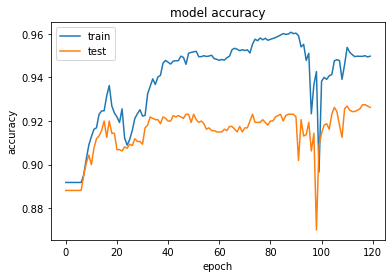

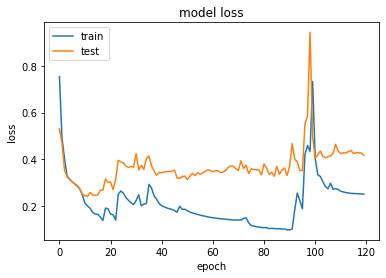

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Check the Results

In [39]:
pred = model.predict(X_test, verbose=1)

200/200 [==============================] - 0s 965us/step


In [40]:
idxs = []
idxs2 = []

# 참고사이트: https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array/38884051

for i in range(len(pred)):
    # 1st largest idx
    preds = pred[i]
    preds = list(preds)
    idx = np.argmax(preds)
    idxs.append(idx)
    
    # 2nd largest idx
    flat= preds.copy()
    flat.sort()
    for idx2 in range(len(preds)):
        # print(type(flat))
        if flat[-2] == preds[idx2]:
            idxs2.append(idx2)
            
# idxs: 첫번째로 큰 값
# idxs2: 두번째로 큰 값

In [41]:
pred_1 = pred.copy()

for i in range(len(pred_1)):
    # print(pred[i][idxs[i]])
    for j in range(len(pred_1[i])):
        if j!=idxs[i]:
            pred_1[i][j] = 0
        else:
            pred_1[i][j] = 1

            
pred_2 = pred.copy()

for i in range(len(pred_2)):
    # print(pred[i][idxs[i]])
    for j in range(len(pred_2[i])):
        if j!=idxs2[i]:
            pred_2[i][j] = 0
        else:
            pred_2[i][j] = 1